# feature permutation

### imports

In [1]:
import pickle
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from joblib import load

### feature permutation

In [3]:
try:
    X = pd.read_pickle("data/processed/calc_descriptors_final.pkl")
except FileNotFoundError:
    print("Error: 'data/processed/calc_descriptors_final.pkl' not found.")

scaler = MinMaxScaler()
X["Ipc"] = scaler.fit_transform(X["Ipc"].values.reshape(-1, 1))

In [4]:
names=X.columns
#print(names)
results_te=load("data/processed/PI_test.joblib")
results_te=pd.DataFrame.from_dict(results_te["importances"].T)
results_te.columns=X.columns
results_te

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,NumRadicalElectrons,AvgIpc,BalabanJ,HallKierAlpha,Ipc,...,fr_NH0,fr_NH2,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ketone,fr_para_hydroxylation,fr_piperdine
0,0.081193,0.100201,0.024475,0.036636,0.023294,0.008466,0.024277,0.018853,0.432155,0.014755,...,0.165562,0.028906,0.054520,0.029539,0.004168,0.008307,0.080246,0.110753,0.003062,0.006701
1,0.083570,0.097979,0.023190,0.036499,0.023930,0.008593,0.024407,0.018738,0.430665,0.014916,...,0.169337,0.028630,0.054313,0.029071,0.004110,0.008638,0.081983,0.111132,0.003172,0.006792
2,0.080554,0.097953,0.023089,0.036664,0.023424,0.007559,0.024466,0.019102,0.432676,0.014768,...,0.170237,0.029302,0.050735,0.029113,0.003802,0.008497,0.081564,0.113104,0.003456,0.006844
3,0.083265,0.098464,0.024017,0.036244,0.024288,0.008586,0.024587,0.018026,0.429045,0.015009,...,0.169525,0.029413,0.051078,0.028745,0.003973,0.008640,0.079670,0.111238,0.003148,0.007080
4,0.079952,0.098132,0.023670,0.036939,0.022732,0.007888,0.024046,0.018717,0.425636,0.014994,...,0.167850,0.029657,0.051847,0.028610,0.004068,0.008371,0.083383,0.111644,0.003660,0.006945
5,0.081992,0.100978,0.023349,0.036698,0.023377,0.008072,0.024146,0.018644,0.435964,0.015100,...,0.171130,0.028362,0.054566,0.028400,0.003836,0.008644,0.081050,0.109929,0.003180,0.006641
6,0.080818,0.099384,0.023283,0.036484,0.023714,0.009108,0.024172,0.018741,0.419090,0.015486,...,0.168637,0.029098,0.052103,0.029215,0.004292,0.008466,0.081254,0.111174,0.003242,0.006819
7,0.084380,0.096498,0.023301,0.035682,0.024474,0.008029,0.024563,0.018380,0.428931,0.015106,...,0.167900,0.027834,0.056623,0.028758,0.004068,0.009085,0.082355,0.110490,0.003322,0.006698
8,0.082723,0.100320,0.023660,0.037035,0.023615,0.007986,0.023606,0.018171,0.432488,0.014797,...,0.168625,0.028434,0.056515,0.029207,0.004041,0.008962,0.082503,0.111412,0.003066,0.006773
9,0.082065,0.101697,0.023920,0.035889,0.023146,0.008263,0.024806,0.018784,0.425376,0.014945,...,0.170470,0.029965,0.053279,0.029430,0.003924,0.008373,0.083069,0.109424,0.003039,0.006695


In [5]:
column_means = results_te.mean()
sorted_columns = column_means.sort_values(ascending=False).index

# Reorder the dataframe columns
results_te= results_te[sorted_columns]
results_te

,NumAromaticCarbocycles,SMR_VSA7,SMR_VSA10,HallKierAlpha,fr_NH0,NumAromaticHeterocycles,SlogP_VSA8,SMR_VSA3,fr_ketone,MinAbsEStateIndex,...,fr_bicyclic,NumRadicalElectrons,fr_piperdine,EState_VSA2,fr_aryl_methyl,EState_VSA3,fr_para_hydroxylation,EState_VSA5,EState_VSA4,EState_VSA6
0,1.006837,0.565345,0.508282,0.432155,0.165562,0.162154,0.148070,0.145554,0.110753,0.100201,...,0.008307,0.008466,0.006701,0.005087,0.004168,0.004422,0.003062,0.002888,0.002652,0.002272
1,1.012065,0.565187,0.506730,0.430665,0.169337,0.158554,0.148215,0.145024,0.111132,0.097979,...,0.008638,0.008593,0.006792,0.005252,0.004110,0.004117,0.003172,0.002539,0.002304,0.001530
2,1.020652,0.567310,0.515654,0.432676,0.170237,0.163988,0.148825,0.151676,0.113104,0.097953,...,0.008497,0.007559,0.006844,0.005107,0.003802,0.003574,0.003456,0.002967,0.002764,0.001346
3,1.028540,0.572442,0.517299,0.429045,0.169525,0.158906,0.146348,0.144360,0.111238,0.098464,...,0.008640,0.008586,0.007080,0.005390,0.003973,0.003329,0.003148,0.002729,0.003181,0.002176
4,1.005898,0.565874,0.505924,0.425636,0.167850,0.163438,0.147853,0.148055,0.111644,0.098132,...,0.008371,0.007888,0.006945,0.005327,0.004068,0.003367,0.003660,0.002860,0.002807,0.001563
5,1.004190,0.571487,0.517999,0.435964,0.171130,0.158414,0.146575,0.150311,0.109929,0.100978,...,0.008644,0.008072,0.006641,0.005072,0.003836,0.003398,0.003180,0.002610,0.002814,0.001907
6,0.989486,0.562370,0.508263,0.419090,0.168637,0.157448,0.144435,0.147429,0.111174,0.099384,...,0.008466,0.009108,0.006819,0.005322,0.004292,0.003083,0.003242,0.002930,0.002694,0.002368
7,0.983185,0.564358,0.512685,0.428931,0.167900,0.157233,0.144908,0.146270,0.110490,0.096498,...,0.009085,0.008029,0.006698,0.005144,0.004068,0.003780,0.003322,0.002989,0.002888,0.001902
8,1.017117,0.573912,0.510413,0.432488,0.168625,0.159569,0.148209,0.147408,0.111412,0.100320,...,0.008962,0.007986,0.006773,0.004939,0.004041,0.004152,0.003066,0.003058,0.002567,0.001807
9,1.005099,0.574590,0.509887,0.425376,0.170470,0.157994,0.146586,0.146399,0.109424,0.101697,...,0.008373,0.008263,0.006695,0.004994,0.003924,0.003633,0.003039,0.003261,0.002296,0.001625


/tmp/ipykernel_24837/1925699522.py:3: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  ax.boxplot(importances, meanline=True, vert=False, whis=10,widths=0.8, boxprops={"linewidth":0.5},capprops={"linewidth":0.5},meanprops={"linewidth":0.5})


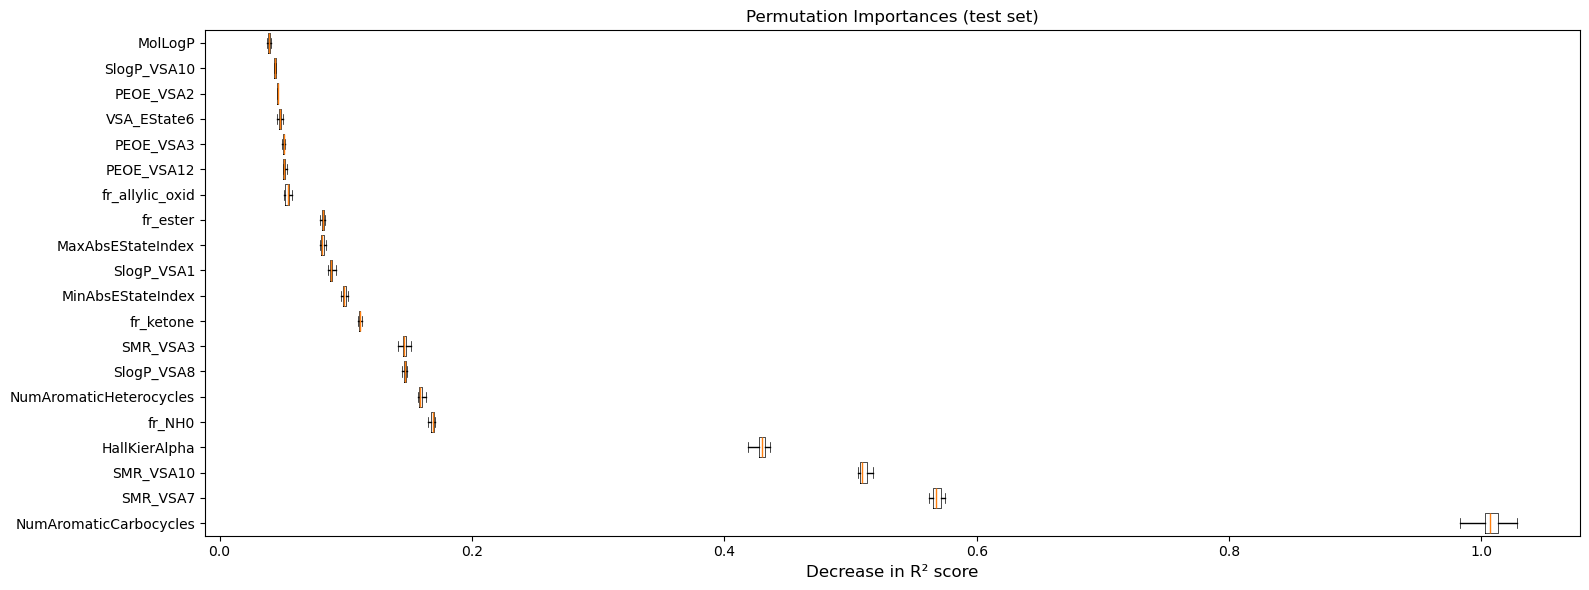

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 6))
for ax, (name, importances) in zip([ax1], [("test", results_te[results_te.columns[:20]])]): #.iloc[:, :10]     #[:,0:10]
    ax.boxplot(importances, meanline=True, vert=False, whis=10,widths=0.8, boxprops={"linewidth":0.5},capprops={"linewidth":0.5},meanprops={"linewidth":0.5})
    ax.set_title(f"Permutation Importances ({name} set)", fontsize=12)
    ax.set_xlabel("Decrease in R² score", fontsize=12)
    #ax.axvline(x=0, color="k", linestyle="--")
    #ax.tick_params(axis='y', labelsize=10)
    #print(importances)
    ax.set_yticklabels(results_te.columns[:20], fontsize=10, rotation=0)
    ax.tick_params(axis='x',labelsize=10)

fig.tight_layout()  # Adjust layout to avoid 
#plt.savefig("permutation_importance_test.png") # keep this comment